In [1]:
%load_ext autoreload
%autoreload 2
from confignb import *

X, y, ks, pts, masks = util.load_data("data/raw/ASCADv.h5")

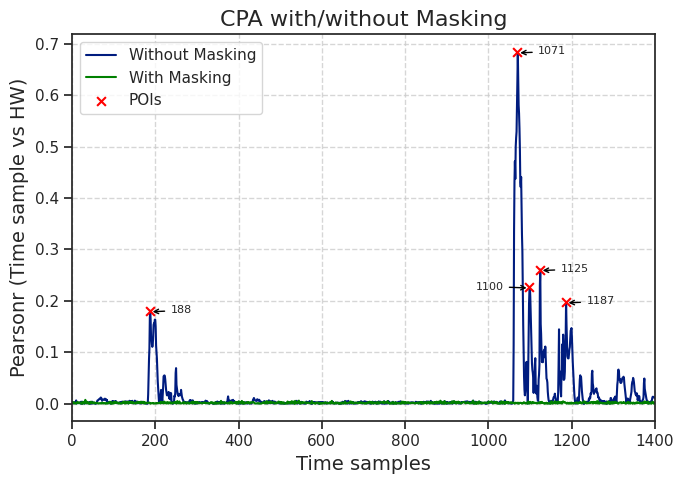

In [2]:
from scipy import stats

rho1, _ = stats.pearsonr(X, util.hw(util.SBOX[ks ^ pts] ^ masks)[:, None])
rho2, _ = stats.pearsonr(X, util.hw(y)[:, None])

fig, ax = plt.subplots(figsize=(7, 5))
rho1 = np.abs(rho1)
ax.plot(rho1)
rho2 = np.abs(rho2)
ax.plot(rho2, color='green')

def annotate_pois(ax, pois, stat, shift):
    for poi, (sx, sy) in zip(pois, shift):
        x = poi - 1
        y = stat[poi]
        ax.annotate(str(poi), xy=(x, y-0.002), xytext=(x+sx, y+sy),
            fontsize=8, arrowprops=dict(
                arrowstyle="->", color="black", lw=1
            ),
        )

kbest = [188, 1071, 1100, 1125, 1187]
ax.scatter(np.array(kbest)-1, rho1[kbest], color="red",
           marker='x', s=40, zorder=3)
annotate_pois(ax, kbest, rho1, shift=[
    (50, -0.005), (50, -0.005), (-130, -0.005), (50, -0.005), (50, -0.005)
])

ax.set_xlim(0, X.shape[1])
ax.grid(True, linestyle="--", alpha=0.8)
plots.labs(ax, "Time samples", "Pearsonr (Time sample vs HW)", "CPA with/without Masking")
ax.legend(["Without Masking", "With Masking", "POIs",], loc="upper left")
plt.tight_layout()

plots.savetight(fig, "cpa_masking_vs_no_masking.png")

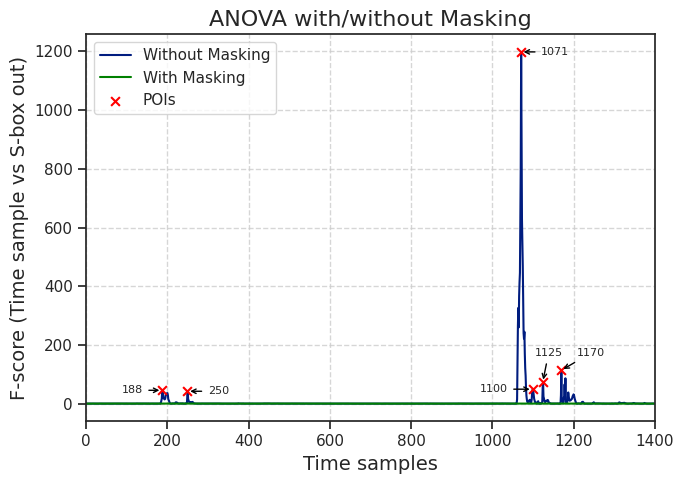

In [3]:
fstat1, _ = stats.f_oneway(*[X[y == b] for b in range(256)], axis=0)

u = util.SBOX[ks ^ pts] ^ masks
fstat2, _ = stats.f_oneway(*[X[u == k] for k in range(256)], axis=0)

fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(fstat2)
ax.plot(fstat1, color='green')

ax.set_xlim(0, X.shape[1])
ax.grid(True, linestyle="--", alpha=0.8)
plots.labs(ax, "Time samples", "F-score (Time sample vs S-box out)", "ANOVA with/without Masking")

kbest = [188, 250, 1071, 1100, 1125, 1170]
ax.scatter(np.array(kbest)-1, fstat2[kbest], color="red",
           marker='x', s=40, zorder=3)

annotate_pois(ax, kbest, fstat2, shift=[
    (-100, -10), (50, -10), (50, -10), (-130, -10), (-20, 90), (40, 50)
])

ax.legend(["Without Masking", "With Masking", "POIs"], loc="upper left")
plt.tight_layout()
plots.savetight(fig, "anova_masking_vs_no_masking.png")